## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [7]:
# Importing dataset
data = pd.read_csv('yelp_labelled.csv')

In [8]:
data.head()

,clean_txt,category
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
# information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   clean_txt  1000 non-null   object
 1   category   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [10]:
print(data.head())

                                           clean_txt  category
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1


In [11]:
# Checking for Null values
print(data.isnull().sum())

print("\n---------------------------------")
print("There is no missing or Null Value")
print("---------------------------------")

clean_txt    0
category     0
dtype: int64

---------------------------------
There is no missing or Null Value
---------------------------------


In [12]:
data.describe()

,category
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [18]:
from textblob import TextBlob
# Define a function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Mixed'

# Apply the function to create a new column
data['Sentiment'] = data['clean_txt'].apply(get_sentiment)

# Create columns for each sentiment type
data['Positive'] = data['Sentiment'] == 'Positive'
data['Negative'] = data['Sentiment'] == 'Negative'
data['Neutral'] = data['Sentiment'] == 'Neutral'
data['Mixed'] = data['Sentiment'] == 'Mixed'

# Convert boolean to integer
data[['Positive', 'Negative', 'Neutral', 'Mixed']] = data[['Positive', 'Negative', 'Neutral', 'Mixed']].astype(int)

# View the updated DataFrame
print(data.head())


                                           clean_txt  category Sentiment  \
0                           Wow... Loved this place.         1  Positive   
1                                 Crust is not good.         0  Negative   
2          Not tasty and the texture was just nasty.         0  Negative   
3  Stopped by during the late May bank holiday of...         1  Positive   
4  The selection on the menu was great and so wer...         1  Positive   

   Positive  Negative  Neutral  Mixed  
0         1         0        0      0  
1         0         1        0      0  
2         0         1        0      0  
3         1         0        0      0  
4         1         0        0      0  


In [19]:
# Display value counts of Sentiment
print("Sentiment Value Counts:")
print(data['Sentiment'].value_counts())


Sentiment Value Counts:
Sentiment
Positive    475
Neutral     237
Negative    216
Mixed        72
Name: count, dtype: int64


In [20]:

# Count the occurrences of each sentiment and get the top 10
top_sentiments_count = data['Sentiment'].value_counts().head(12)
top_sentiments = top_sentiments_count.index

In [21]:
# Display the DataFrame as a table
print(top_sentiments_count)

Sentiment
Positive    475
Neutral     237
Negative    216
Mixed        72
Name: count, dtype: int64


In [22]:
# Filter the data to include only the top 10 sentiments
filtered_data = data[data['Sentiment'].isin(top_sentiments)]

C:\Users\aksha\AppData\Local\Temp\ipykernel_31660\3263298214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='Sentiment', palette='viridis', order=top_sentiments)


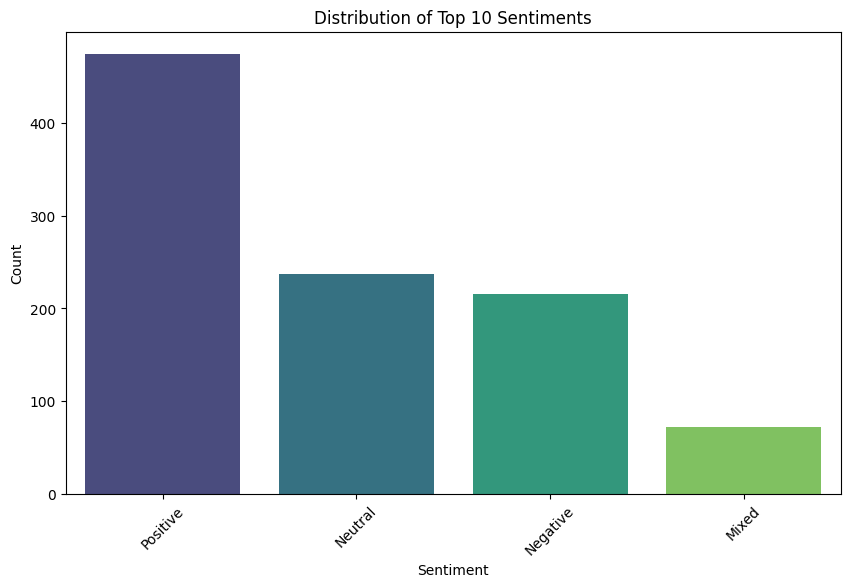

In [23]:
# Plot the distribution of the top 10 sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='Sentiment', palette='viridis', order=top_sentiments)
plt.title('Distribution of Top 10 Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if necessary for better readability
plt.show()

In [27]:
# Clean the dataset
# Remove unnecessary columns
data = data.drop(columns=['Positive', 'Negative', 'Neutral', 'Mixed'])

In [28]:
# Save the cleaned and processed dataset to a new CSV file
output_file_path = 'EDA_sentimentdataset.csv'
data.to_csv(output_file_path, index=False)
print(f"\nCleaned dataset saved to {output_file_path}")


Cleaned dataset saved to EDA_sentimentdataset.csv


## Data Preprocessing

In [70]:
# Importing dataset
data = pd.read_csv('EDA_sentimentdataset.csv')

In [71]:
data.head()

,clean_txt,category,Sentiment
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday of...,1,Positive
4,The selection on the menu was great and so wer...,1,Positive


In [72]:
# # Initialize NLTK resources
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

In [73]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [74]:
# Drop rows with missing values
data.dropna(inplace=True)

In [75]:
# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

In [76]:
# Convert text to lowercase
data['clean_txt'] = data['clean_txt'].str.lower()

# Remove punctuation
data['clean_txt'] = data['clean_txt'].str.replace(r'[^\w\s]', '', regex=True)

# Remove numbers
data['clean_txt'] = data['clean_txt'].str.replace(r'\d+', '', regex=True)

# Tokenize the text
data['preprocessed'] = data['clean_txt'].str.split()

In [78]:
# Rejoin tokens into a single string
data['Cleaned_Text'] = data['preprocessed'].apply(lambda x: ' '.join(x))

In [79]:
# Check the unique values and counts for the 'Sentiment' column
print("Unique Sentiment Counts:\n", data['Sentiment'].value_counts())

Unique Sentiment Counts:
 Sentiment
Positive    474
Neutral     235
Negative    215
Mixed        72
Name: count, dtype: int64


In [80]:
data.head()

,clean_txt,category,Sentiment,preprocessed,Cleaned_Text
0,wow loved this place,1,Positive,"[wow, loved, this, place]",wow loved this place
1,crust is not good,0,Negative,"[crust, is, not, good]",crust is not good
2,not tasty and the texture was just nasty,0,Negative,"[not, tasty, and, the, texture, was, just, nasty]",not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...,1,Positive,"[stopped, by, during, the, late, may, bank, ho...",stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...,1,Positive,"[the, selection, on, the, menu, was, great, an...",the selection on the menu was great and so wer...


In [81]:
# Remove unnecessary columns
data = data.drop(columns=['clean_txt','preprocessed'])

In [83]:
# Reorder columns to move the last column to the first position
data = data[[data.columns[-1]] + list(data.columns[:-1])]

In [84]:
data.head()

,Cleaned_Text,category,Sentiment
0,wow loved this place,1,Positive
1,crust is not good,0,Negative
2,not tasty and the texture was just nasty,0,Negative
3,stopped by during the late may bank holiday of...,1,Positive
4,the selection on the menu was great and so wer...,1,Positive


In [86]:
# Save the cleaned dataset
cleaned_file_path = 'yelp_labelled_sentiments.csv'
data.to_csv(cleaned_file_path, index=False)

print("Preprocessing completed and saved to:", cleaned_file_path)

Preprocessing completed and saved to: yelp_labelled_sentiments.csv


## Word Cloud

In [87]:
pip install pandas nltk wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [88]:
from wordcloud import WordCloud
# Generate the word cloud
text = ' '.join(data['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

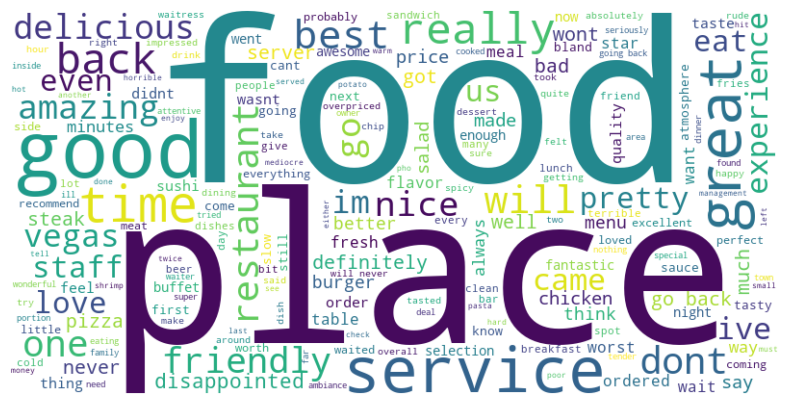

In [89]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative

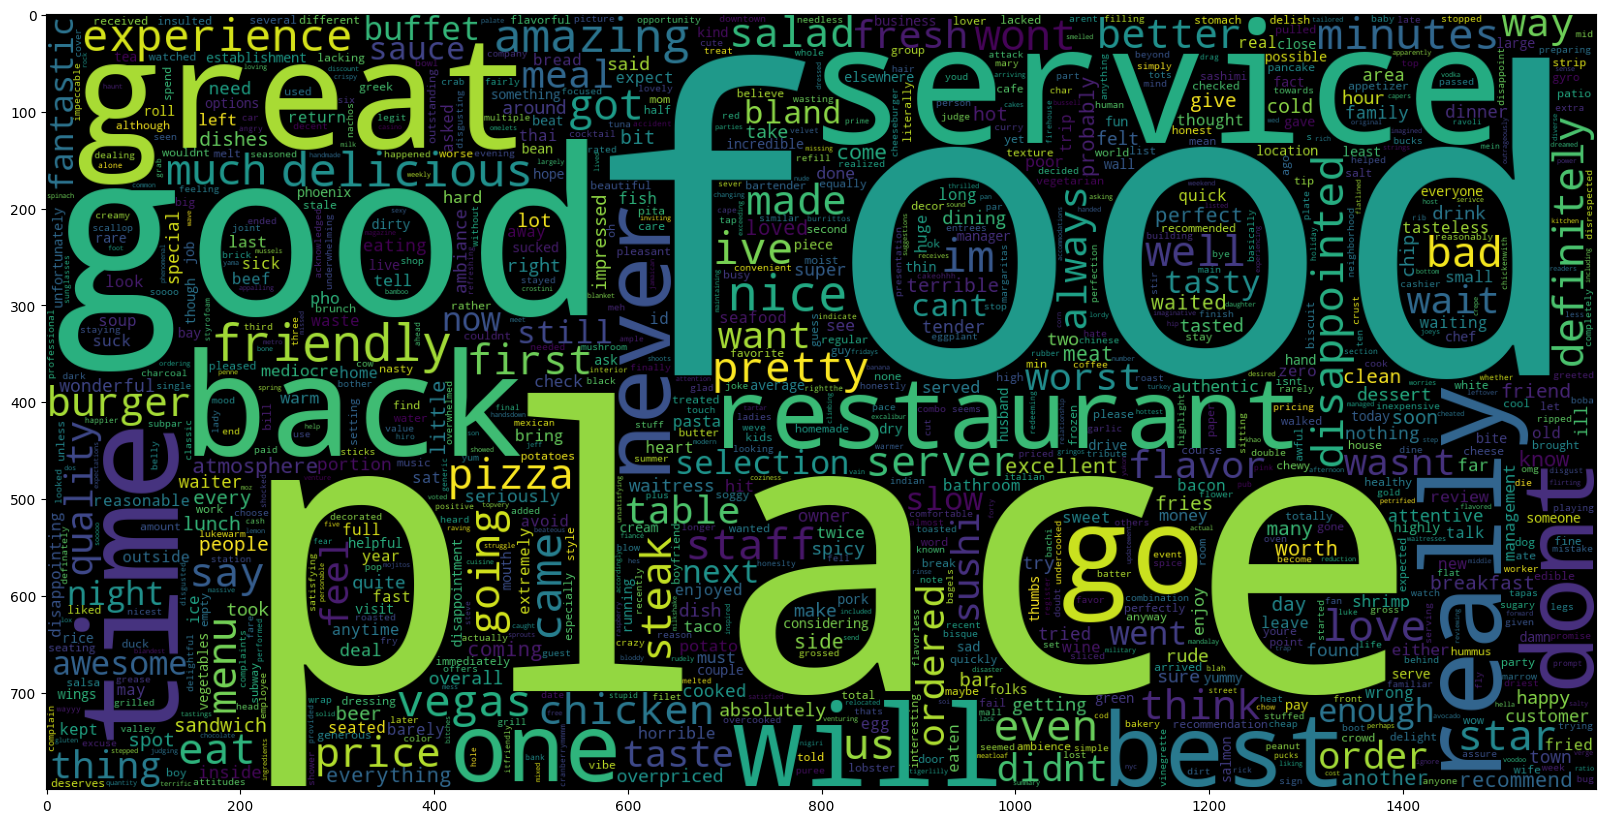

In [90]:
data_neg = data['Cleaned_Text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

### Positive

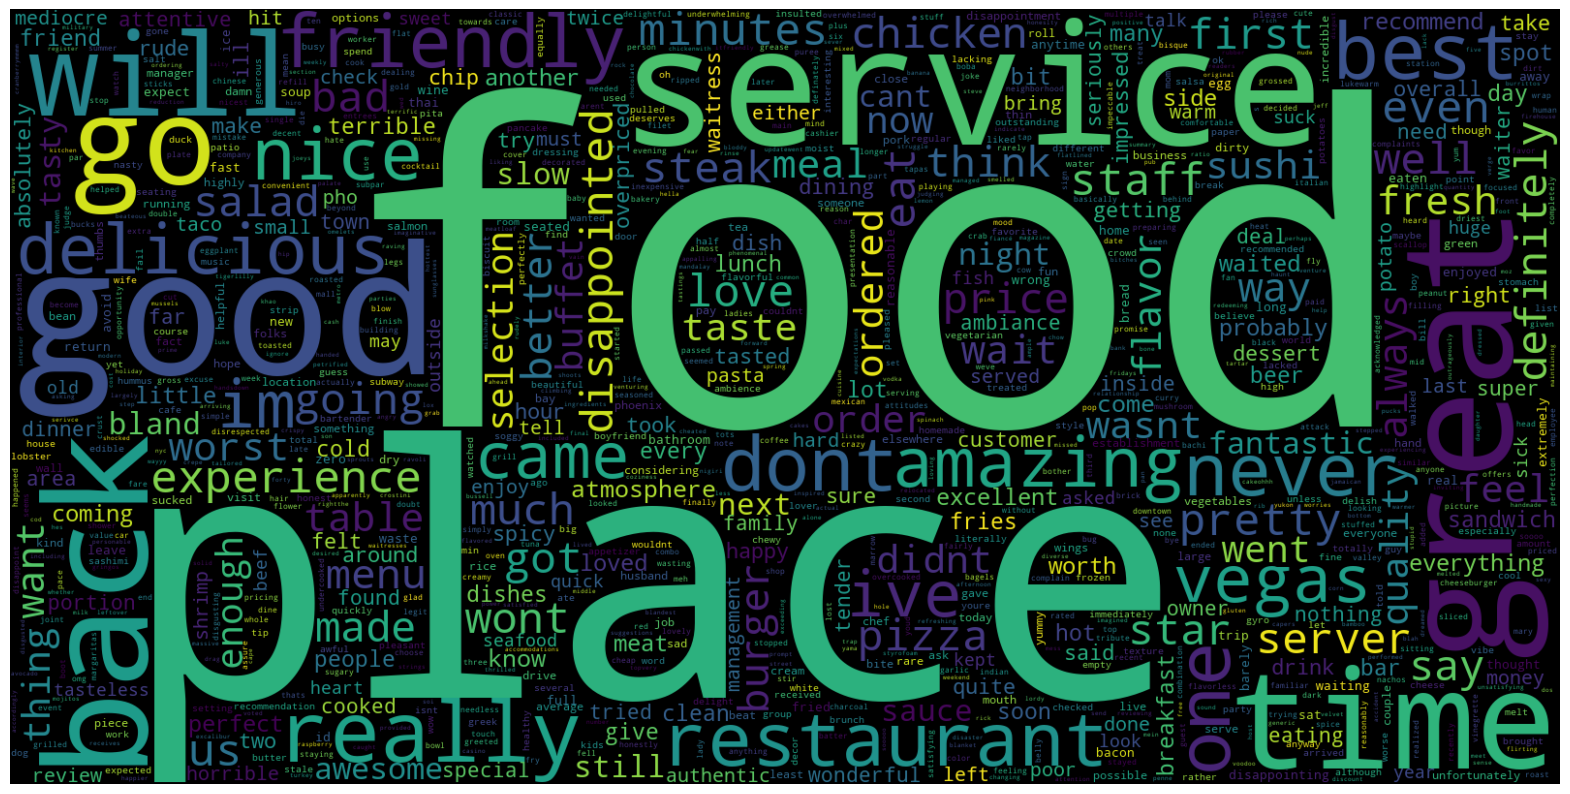

In [92]:
# Select the positive text data
data_pos = data['Cleaned_Text'][:800000]

# Create and display the word cloud
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()

### Nuetral

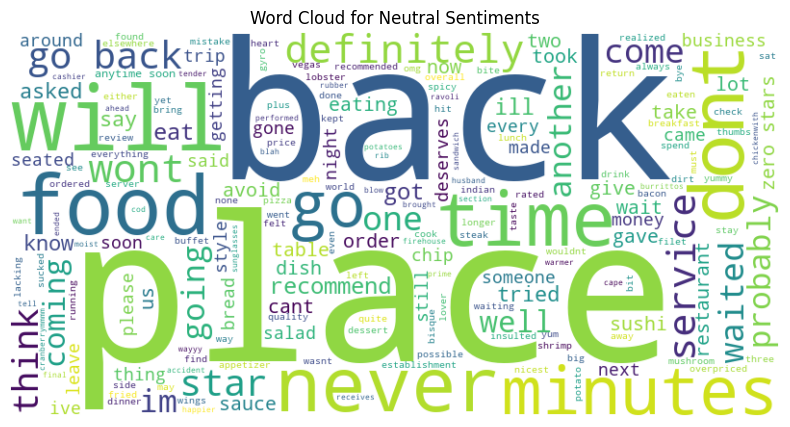

In [95]:
# Filter the dataframe for neutral sentiment
neutral_text = data[data['Sentiment'] == 'Neutral']['Cleaned_Text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

### Mixed

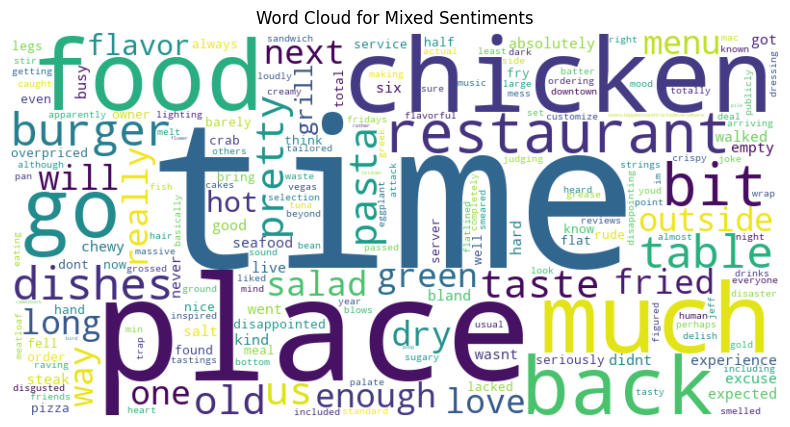

In [98]:
# Filter the dataframe for mixed sentiment
mixed_text = data[data['Sentiment'] == 'Mixed']['Cleaned_Text'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mixed_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Mixed Sentiments')
plt.show()

## Text Blob

In [99]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
data['Sentiment_Score'] = data['Cleaned_Text'].apply(analyze_sentiment)

In [100]:
data.head()

,Cleaned_Text,category,Sentiment,Sentiment_Score
0,wow loved this place,1,Positive,0.40
1,crust is not good,0,Negative,-0.35
2,not tasty and the texture was just nasty,0,Negative,-1.00
3,stopped by during the late may bank holiday of...,1,Positive,0.20
4,the selection on the menu was great and so wer...,1,Positive,0.80


In [101]:
# Save the cleaned dataset
cleaned_file_path = 'final_yelp_labelled_sentiments.csv'
data.to_csv(cleaned_file_path, index=False)

print("Preprocessing completed and saved to:", cleaned_file_path)

Preprocessing completed and saved to: final_yelp_labelled_sentiments.csv
